In this notebook file, our objective is to develop a regression model for the S&P 500 index, leveraging historical data loaded from the CSV file 'SP500_5y.csv'. The goal is to build a regression line that captures the relationship between the dates, utilizing the default index as the date placeholder, and the target variable (the S&P 500 index's closing price). By employing a regression approach, you aim to understand and quantify the impact of these features on the S&P 500 index's behavior over time. Additionally, you intend to utilize this regression model to make predictions about future values of the S&P 500 index, thereby providing valuable insights for investment decision-making and financial planning purposes. The preprocessing steps undertaken, sorting the data chronologically, and handling any missing values, are essential for ensuring the integrity and reliability of the regression analysis. Overall, this notebook represents a systematic approach towards developing a regression model to predict the future behavior of the S&P 500 index based on historical data of the last 5 years.

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from prophet import Prophet
import matplotlib.pyplot as plt
import math

# Load data from CSV
sp_data = pd.read_csv('SP500_5y.csv', parse_dates=['Date'])

# Ensure 'date' column is in datetime format
sp_data['Date'] = pd.to_datetime(sp_data['Date'], utc=True)

# Sorting by date 
sp_data.sort_values(by='Date', inplace=True)

# Handling missing values if any
sp_data.dropna(inplace=True)


In [80]:
# Displaying columns for better context
sp_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [81]:
# Display DataFrame for context
sp_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-02-11 05:00:00+00:00,2712.399902,2718.050049,2703.790039,2709.800049,3395330000,0.0,0.0
1,2019-02-12 05:00:00+00:00,2722.610107,2748.189941,2722.610107,2744.729980,3843020000,0.0,0.0
2,2019-02-13 05:00:00+00:00,2750.300049,2761.850098,2748.629883,2753.030029,3684910000,0.0,0.0
3,2019-02-14 05:00:00+00:00,2743.500000,2757.899902,2731.229980,2745.729980,3845390000,0.0,0.0
4,2019-02-15 05:00:00+00:00,2760.239990,2775.659912,2760.239990,2775.600098,3648680000,0.0,0.0


In this code snippet, we're not only preparing the historical data and making future predictions using the Prophet library but also displaying the Prophet model's forecast. By plotting the forecasted values generated by the Prophet model alongside the historical data, we enable a visual comparison between the predictions made by Prophet and the regression line plot. This comparison allows us to assess the performance of both approaches in capturing the underlying trends and patterns in the S&P 500 index data. Additionally, it helps you evaluate the suitability of each method for predicting future values of the S&P 500 index and gain insights into the strengths and limitations of each approach. Overall, this visualization aids in informing your decision-making process regarding the choice of modeling technique for predicting future values of the S&P 500 index.

16:44:43 - cmdstanpy - INFO - Chain [1] start processing
16:44:44 - cmdstanpy - INFO - Chain [1] done processing


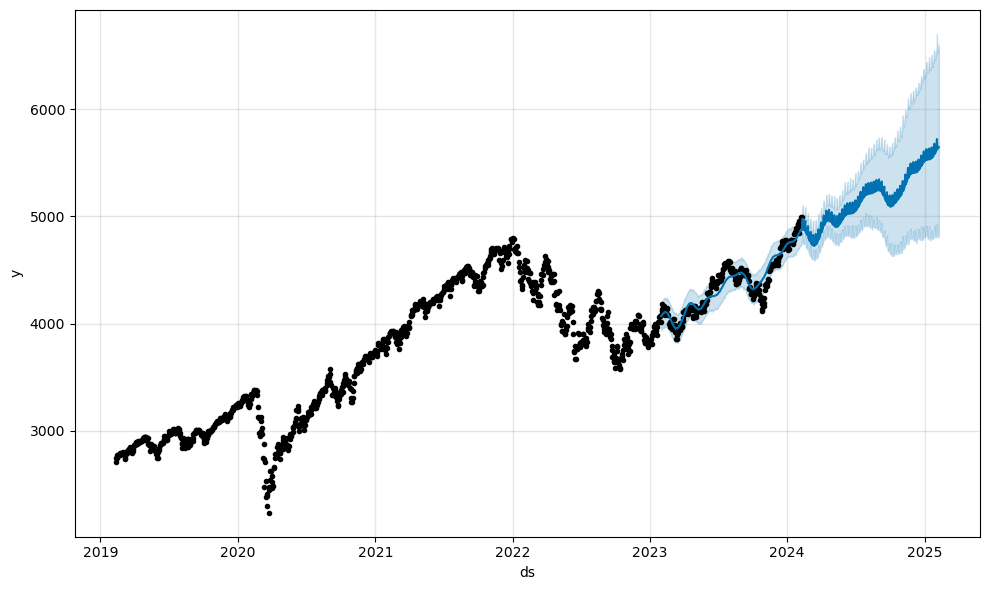

In [82]:


# Prepare data for Prophet
prophet_data = sp_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Remove timezone from the 'ds' column
prophet_data['ds'] = prophet_data['ds'].dt.tz_localize(None)

# Instantiate and fit Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Make future predictions starting from 2023-01-31
future = prophet_model.make_future_dataframe(periods=365, freq='D', include_history=True)
future = future[future['ds'] >= '2023-01-31']  # Subset future dataframe starting from 2023-01-31
forecast = prophet_model.predict(future)

# Plot forecast
fig = prophet_model.plot(forecast)

In the provided code snippet, the forecast generated by the Prophet model represents predictions for future closing prices of the S&P 500 index. By limiting the x-axis to display only the data for the year 2023, as specified with plt.xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-01-01')), we focus specifically on the forecasted data for this period. The purpose of this visualization is to compare these forecasted closing prices with the actual closing prices of the S&P 500 index for the same time period. By doing so, we aim to evaluate the accuracy and reliability of the Prophet model's predictions by assessing how well they align with the actual market behavior observed in the previous year. This comparison helps to validate the model's performance and provides insights into its ability to capture the underlying trends and patterns in the S&P 500 index data.

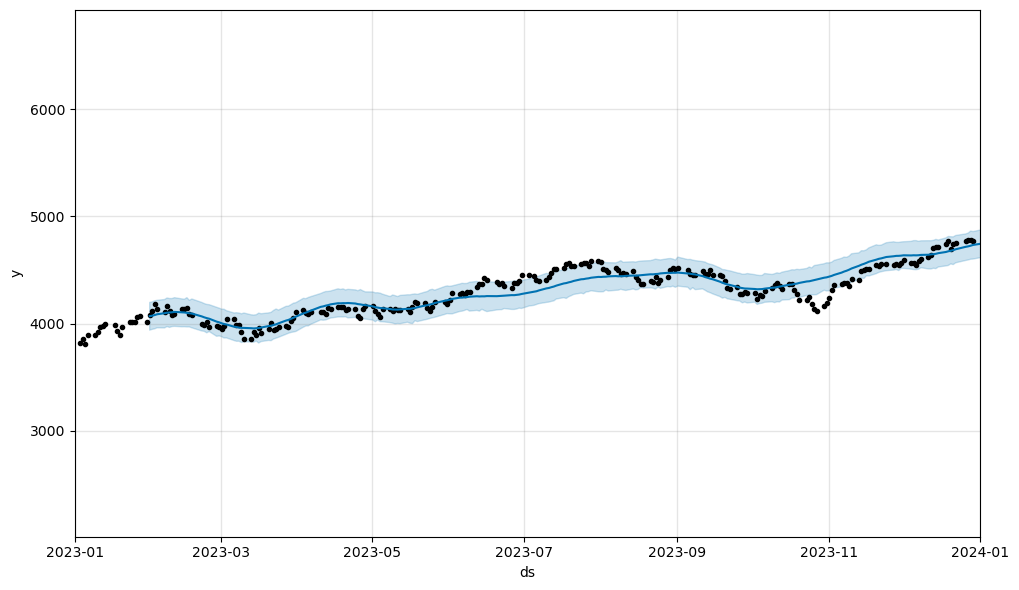

In [83]:
# Plot forecast
fig = prophet_model.plot(forecast)
plt.xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-01-01'))  # Limit x-axis to display only 2023 data
plt.show()

In [84]:
# Extract features and target variable
X = sp_data.index
y = sp_data['Close']

In [85]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [86]:
# Instantiate the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [87]:
# Make predictions on the testing set
y_pred = model.predict(X_test.values.reshape(-1, 1))

Mean Squared Error (MSE): Imagine we have a model that tries to predict the daily closing price of the S&P 500 over the past five years. The MSE tells us, on average, how far off our predictions are from the actual closing prices. So, with an MSE of 122531.07908, it means, on average, the squared difference between our predicted prices and the actual prices is approximately $122531.08. Lower MSE values indicate our model's predictions are closer to the actual prices, which is better.

R-squared (R2): This tells us how much of the ups and downs in the S&P 500's closing prices over the past five years our model can explain. An R-squared value of 0.69123 means that about 69.123% of the variation in the S&P 500's closing prices can be explained by the factors considered in our model. So, the higher the R-squared value, the better our model is at explaining why the S&P 500's prices change the way they do.

In [88]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Round both MSE and R2 to 5 decimal places
mse_rounded = round(mse, 5)
r2_rounded = round(r2, 5)

print("Mean Squared Error (MSE):", mse_rounded)
print("R-squared (R2):", r2_rounded)

Mean Squared Error (MSE): 122531.07908
R-squared (R2): 0.69123


The RMSE measures the average difference between the actual closing prices of the S&P 500 over the past five years and the prices predicted by our model. It's like taking the average distance between each predicted S&P 500 price and the actual price, squaring those distances, finding the average of these squared differences, and then taking the square root of that average.

In this case, with an RMSE of 350.0444, it means, on average, our model's predictions for the closing price of the S&P 500 over the past five years are off by approximately $350.04. Lower RMSE values indicate that our model's predictions are closer to the actual prices, which is generally preferred as it signifies better predictive accuracy

In [89]:


# Calculate RMSE
rmse = math.sqrt(mse)

# Round RMSE to 5 decimals
rmse_rounded = round(rmse, 5)

print("Root Mean Squared Error (RMSE):", rmse_rounded)

Root Mean Squared Error (RMSE): 350.0444


In the provided code below, we're generating future predictions of the S&P 500 index using the Prophet library. After creating a DataFrame named future_df to store these predictions, we extract the date and corresponding predicted closing prices from the forecast DataFrame and rename the columns accordingly. By displaying both the first and last 10 rows of future_df, we obtain a comprehensive view of the predicted closing prices across a range of future dates. This facilitates a quick assessment of the overall trend and variability of the predicted values, aiding in evaluating the model's performance and potential future market trends.

In [90]:
# Create a DataFrame for future predictions
future_df = forecast[['ds', 'yhat']].rename(columns={'ds': 'Date', 'yhat': 'Predicted_Close'}).round(2)

# Display the first 10 rows
display(future_df.head(10))

# Display the last 10 rows
display(future_df.tail(10))

,Date,Predicted_Close
0,2023-01-31 05:00:00,4069.91
1,2023-02-01 05:00:00,4074.43
2,2023-02-02 05:00:00,4080.52
3,2023-02-03 05:00:00,4087.93
4,2023-02-06 05:00:00,4097.78
5,2023-02-07 05:00:00,4102.13
6,2023-02-08 05:00:00,4103.78
7,2023-02-09 05:00:00,4106.45
8,2023-02-10 05:00:00,4109.93
9,2023-02-13 05:00:00,4105.64


,Date,Predicted_Close
613,2025-01-29 05:00:00,5594.94
614,2025-01-30 05:00:00,5602.06
615,2025-01-31 05:00:00,5610.74
616,2025-02-01 05:00:00,5684.26
617,2025-02-02 05:00:00,5721.67
618,2025-02-03 05:00:00,5625.82
619,2025-02-04 05:00:00,5632.34
620,2025-02-05 05:00:00,5635.71
621,2025-02-06 05:00:00,5640.25
622,2025-02-07 05:00:00,5645.73


We're creating a scatter plot to visualize the actual vs. predicted closing prices of the S&P 500 index. The actual closing prices are represented by blue dots, while the regression line, representing the predicted closing prices, is depicted in red. The plot is annotated with a title indicating the RMSE (Root Mean Squared Error) value, providing an insight into the accuracy of the predictions. Additionally, axis labels denote the date on the x-axis and the closing price in USD on the y-axis. By including a legend and gridlines, the plot enhances readability and clarity, facilitating easy interpretation of the relationship between actual and predicted values. This visualization aids in assessing the performance of the regression model and identifying any potential patterns or discrepancies in the predicted data.

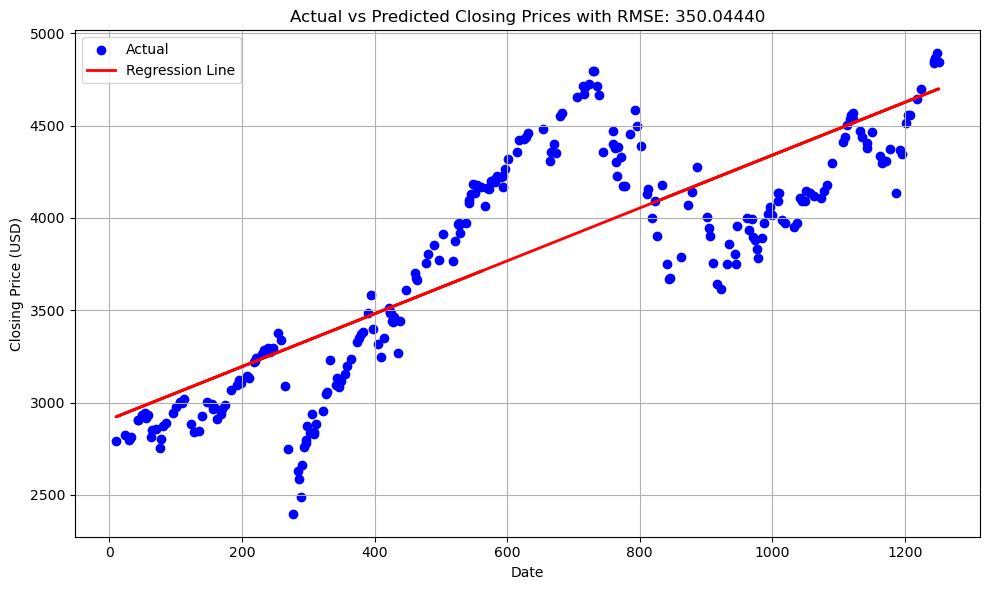

In [91]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot actual values
plt.scatter(y_test.index, y_test, label='Actual', color='blue')

# Plot regression line
plt.plot(y_test.index, y_pred, color='red', linestyle='-', linewidth=2, label='Regression Line')

# Title and labels
plt.title('Actual vs Predicted Closing Prices with RMSE: {:.5f}'.format(rmse))
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')

# Legend with loc='upper left'
plt.legend(loc='upper left')

# Gridlines
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

These predicted values are based on the regression line fitted to the training data. By displaying this DataFrame, we gain additional insights into the predicted values of the S&P 500 index over time, which can be further analyzed or visualized to understand the trends and patterns captured by our regression model. This information is valuable for evaluating the performance of our model and making informed decisions in financial analysis and forecasting tasks.

In [95]:
# Create a DataFrame for the regression line
regression_line_df = pd.DataFrame({'Date': y_test.index, 'Predicted_Close': y_pred})

# Sort the DataFrame by the 'Date' column
regression_line_df.sort_values(by='Date', inplace=True)

# Reset the index
regression_line_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
regression_line_df.tail(10)

,Date,Predicted_Close
242,1202,4629.116081
243,1205,4633.411749
244,1208,4637.707417
245,1218,4652.026312
246,1224,4660.617649
247,1243,4687.823548
248,1244,4689.255438
249,1245,4690.687327
250,1248,4694.982995
251,1251,4699.278664



# Conclusion

While both the regression model and the Prophet model provide valuable insights into the future behavior of the S&P 500 index, the reported evaluation metrics, including the Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and R-squared (R2), reveal the inherent difficulty in accurately predicting the index's movements. The RMSE of 350.0444 and MSE of 122531.07908 highlight the average magnitude of the errors between the predicted and actual values, indicating a notable level of variance in the predictions. Additionally, the R2 value of 0.69123 suggests that approximately 69.123% of the variability in the S&P 500 index's closing prices is captured by the regression model, leaving a significant portion of the variance unexplained. These metrics underscore the challenges in forecasting the S&P 500 index accurately, as the index is influenced by a multitude of complex factors, including economic conditions, geopolitical events, investor sentiment, and market volatility.

Moreover, the unpredictability inherent in financial markets further complicates the task of forecasting the S&P 500 index. Despite the sophisticated modeling techniques employed, such as regression analysis and time series forecasting with Prophet, the dynamic and evolving nature of financial markets introduces inherent uncertainties that are difficult to quantify and predict accurately. Factors such as sudden market shifts, unexpected economic developments, and geopolitical tensions can significantly impact the index's trajectory, rendering even the most advanced predictive models susceptible to errors and inaccuracies. As a result, while regression and Prophet models provide valuable tools for analyzing historical trends and identifying potential patterns, the inherent uncertainty and complexity of financial markets underscore the ongoing challenges in making precise and reliable predictions of the S&P 500 index's future movements.